In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [15]:
#Loading data
data = pd.read_csv('../Part D/data2/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [17]:
#Pre processing
#1. Adjusting column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
cols_to_delete = ['education', 'educationfield', 'employeenumber', 'jobrole', 'maritalstatus', 'monthlyincome',
                  'monthlyrate', 'over18', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
                  'yearswithcurrmanager', 'yearsincurrentrole', 'yearssincelastpromotion', 'dailyrate',
                  'standardhours','department','stockoptionlevel','employeecount','numcompaniesworked']
data.drop(columns=cols_to_delete, inplace=True)

In [5]:
data.shape

(1470, 17)

In [6]:
data.isnull().sum()

age                         0
attrition                   0
businesstravel              0
distancefromhome            0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobsatisfaction             0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
dtype: int64

In [7]:
#Pre processing 2:
#a. Checking data types:
data.dtypes

age                          int64
attrition                   object
businesstravel              object
distancefromhome             int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobsatisfaction              int64
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
totalworkingyears            int64
trainingtimeslastyear        int64
worklifebalance              int64
dtype: object

In [21]:
data['attrition'] = data['attrition'].map({'No': 0, 'Yes': 1})
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
data['overtime'] = data['overtime'].map({'No': 0, 'Yes': 1})
data['businesstravel'] = data['businesstravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

In [23]:
def convert_categorical_to_numerical(data, unique_val=10, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    obj_cols = data.select_dtypes(include=['object']).columns

    for col in obj_cols:
        if col in exclude_cols:
            print(f"Skipped column (manually excluded): {col}")
            continue
        if data[col].nunique() < unique_val:
            data[col] = pd.factorize(data[col])[0]
        else:
            print(f"Skipped column (too many unique values): {col}")
    
    print("Conversion successful.")
    return data

In [10]:
data.dtypes

age                         int64
attrition                   int64
businesstravel              int64
distancefromhome            int64
environmentsatisfaction     int64
gender                      int64
hourlyrate                  int64
jobinvolvement              int64
joblevel                    int64
jobsatisfaction             int64
overtime                    int64
percentsalaryhike           int64
performancerating           int64
relationshipsatisfaction    int64
totalworkingyears           int64
trainingtimeslastyear       int64
worklifebalance             int64
dtype: object

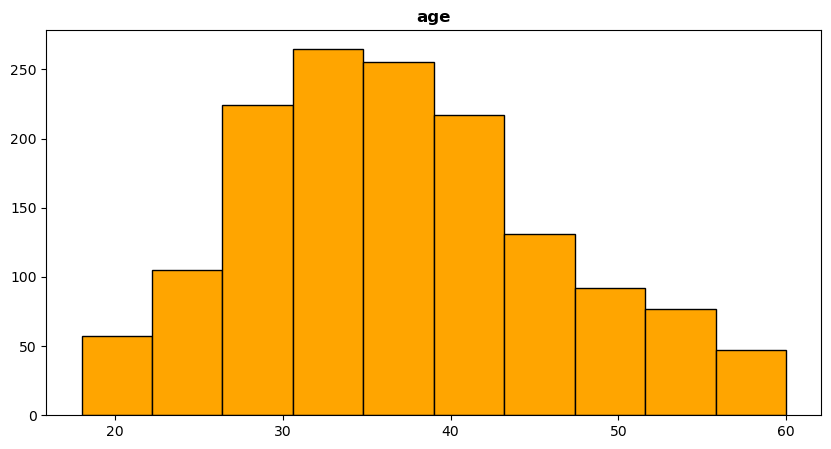

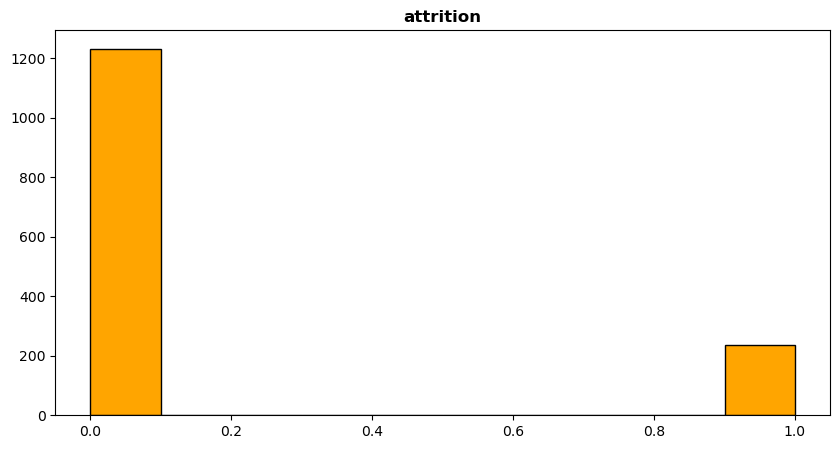

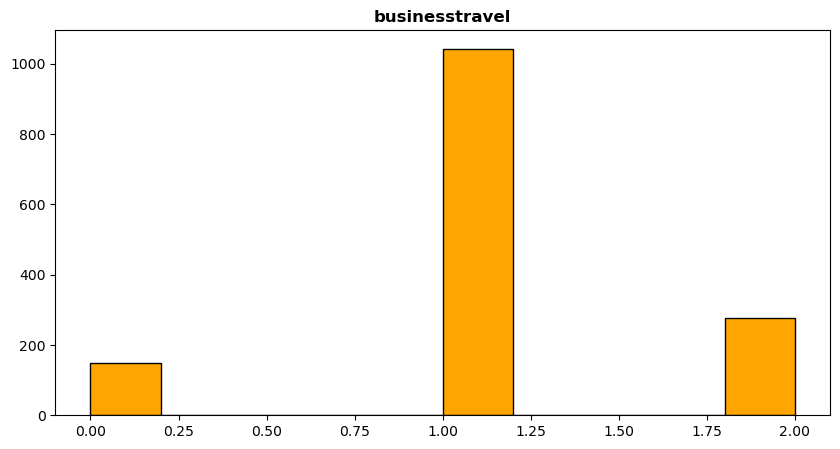

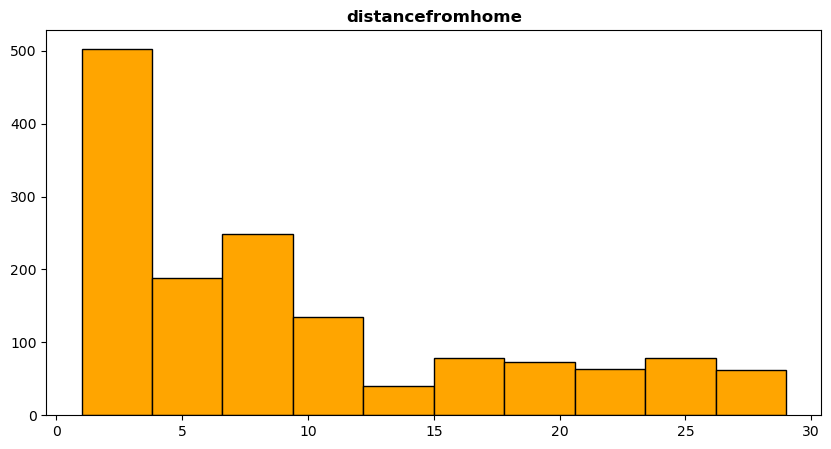

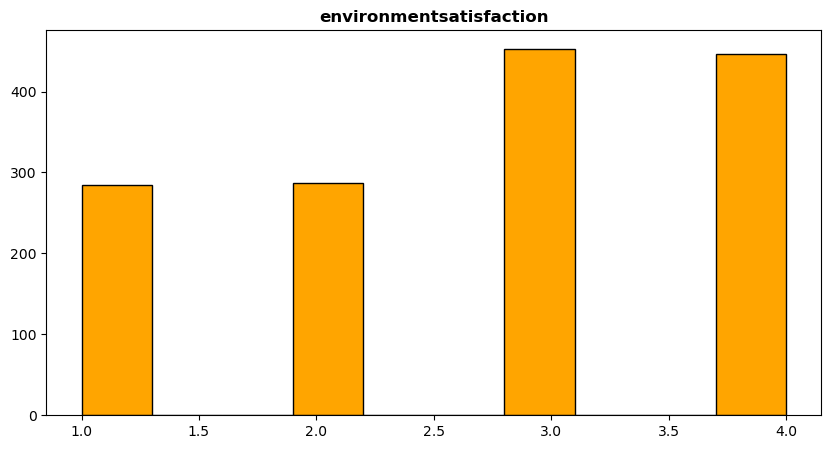

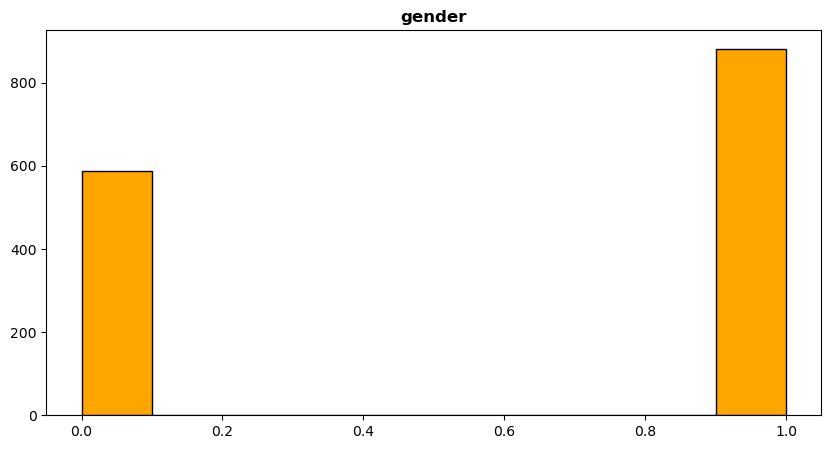

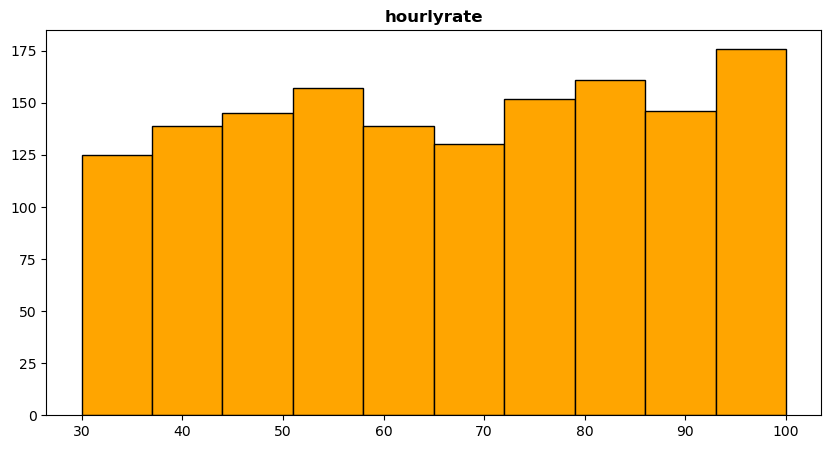

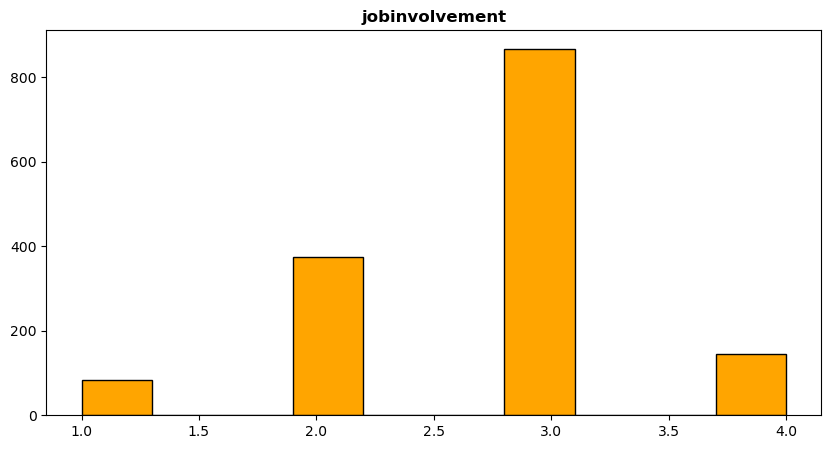

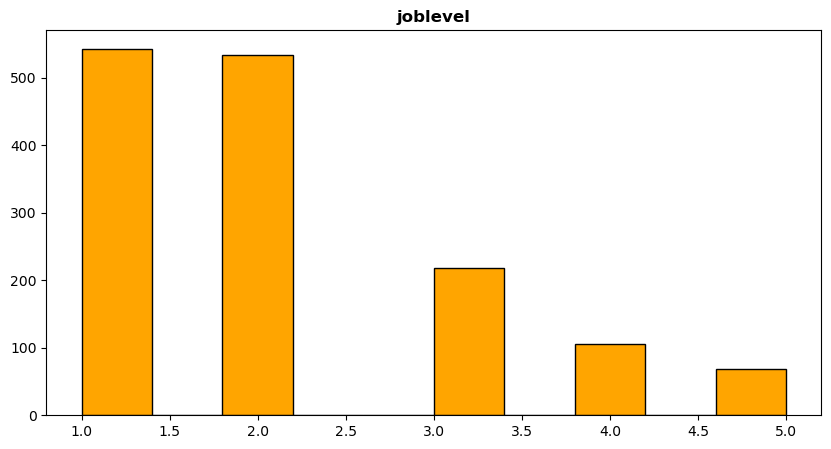

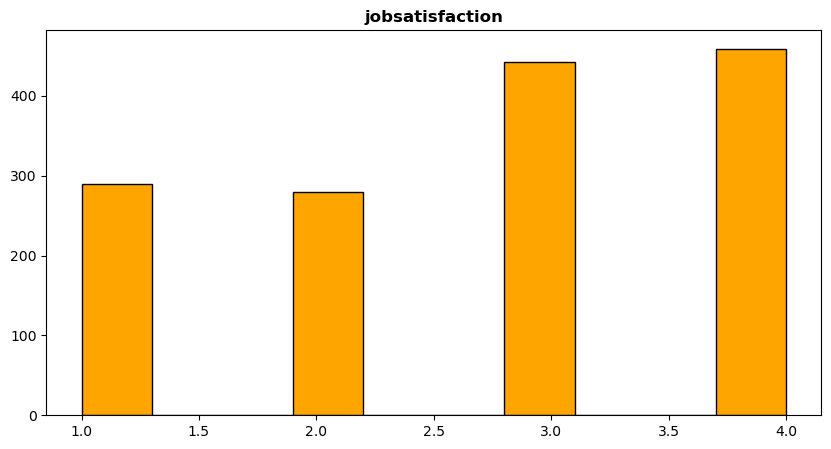

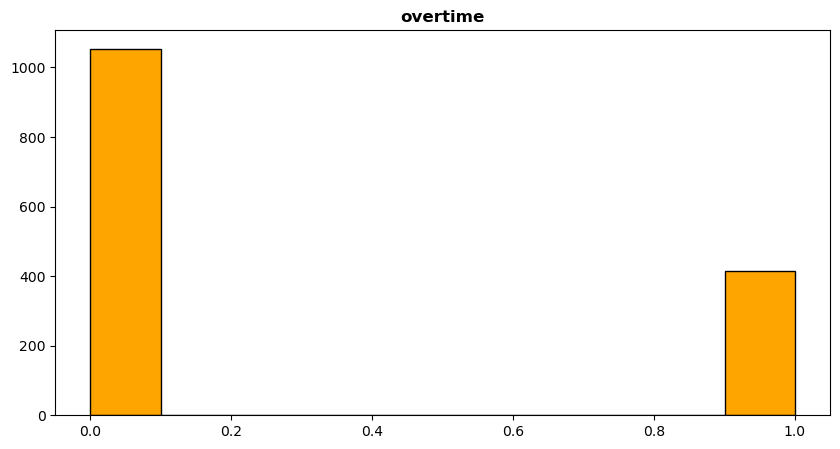

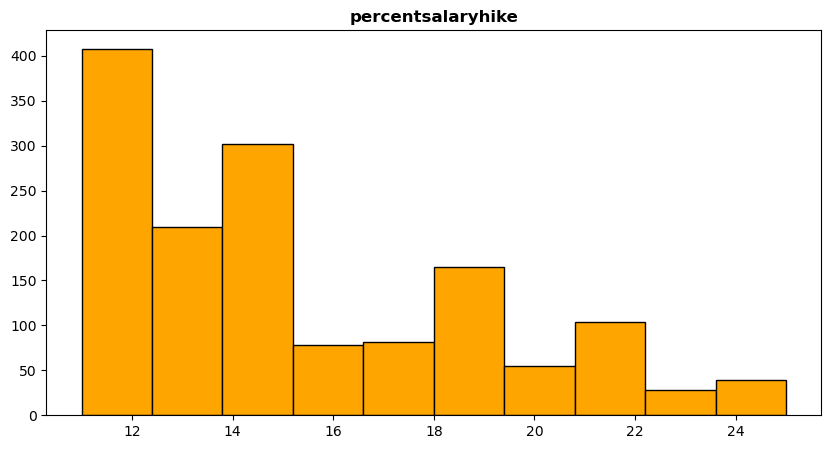

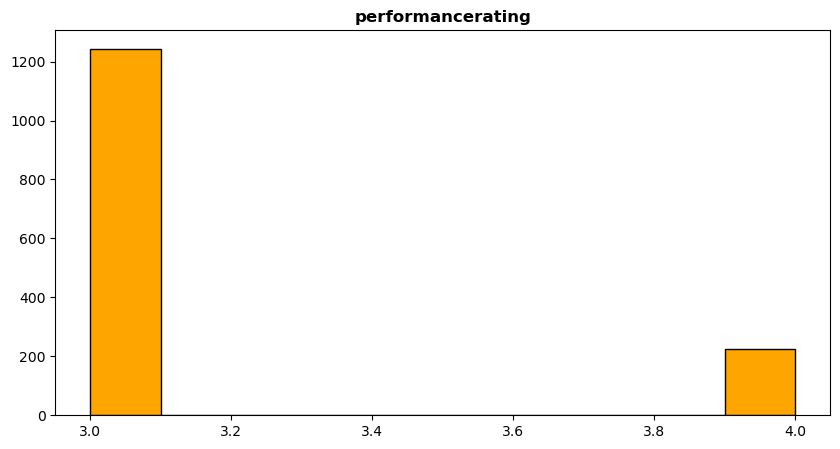

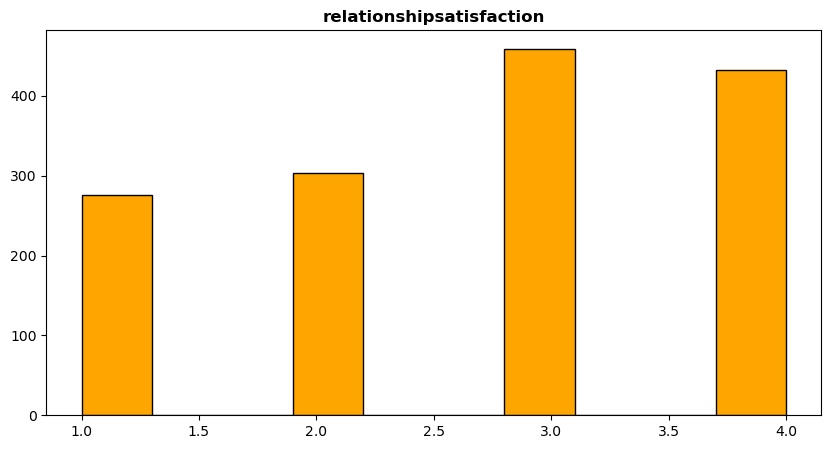

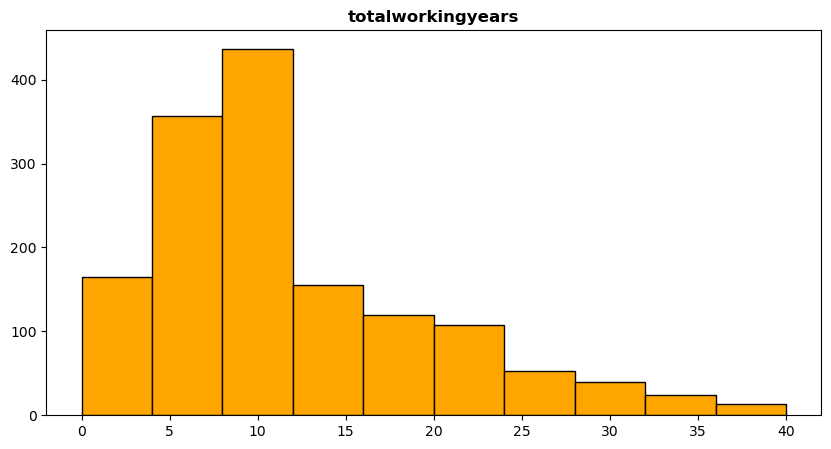

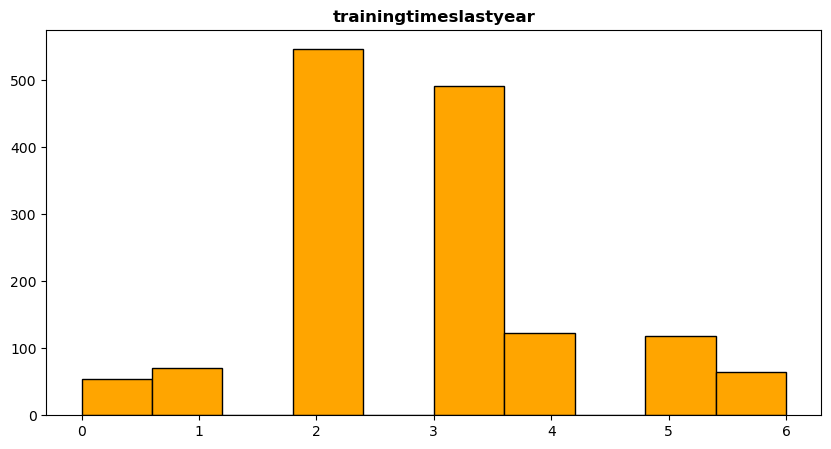

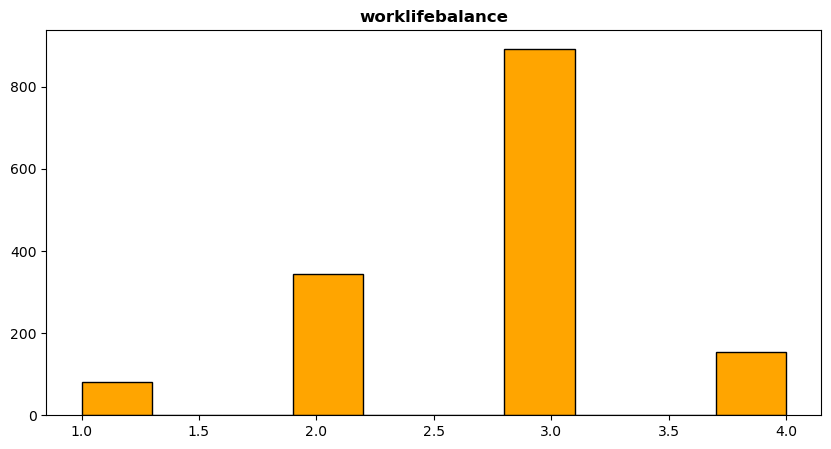

In [27]:
def plot_data(data):
    num_columns = len(data.columns)
    for i in data.columns:
        plt.figure(figsize = (10,5))
        plt.hist(data[i],edgecolor = 'black',color = 'orange')
        plt.title(i,fontweight='bold')
        plt.show()

plot_data(data)

In [12]:
skews = data.select_dtypes(include='number').apply(skew)
print("Skewness of numerical variables:\n", skews)

Skewness of numerical variables:
 age                         0.412864
attrition                   1.842484
businesstravel              0.082343
distancefromhome            0.957140
environmentsatisfaction    -0.321326
gender                     -0.408248
hourlyrate                 -0.032278
jobinvolvement             -0.497911
joblevel                    1.024355
jobsatisfaction            -0.329335
overtime                    0.963504
percentsalaryhike           0.820290
performancerating           1.919921
relationshipsatisfaction   -0.302518
totalworkingyears           1.116032
trainingtimeslastyear       0.552560
worklifebalance            -0.551916
dtype: float64


In [13]:
data

,age,attrition,businesstravel,distancefromhome,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance
0,41,1,1,1,2,0,94,3,2,4,1,11,3,1,8,0,1
1,49,0,2,8,3,1,61,2,2,2,0,23,4,4,10,3,3
2,37,1,1,2,4,1,92,2,1,3,1,15,3,2,7,3,3
3,33,0,2,3,4,0,56,3,1,3,1,11,3,3,8,3,3
4,27,0,1,2,1,1,40,3,1,2,0,12,3,4,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,3,1,41,4,2,4,0,17,3,3,17,3,3
1466,39,0,1,6,4,1,42,2,3,1,0,15,3,1,9,5,3
1467,27,0,1,4,2,1,87,4,2,2,1,20,4,2,6,0,3
1468,49,0,2,2,4,1,63,2,2,2,0,14,3,4,17,3,2


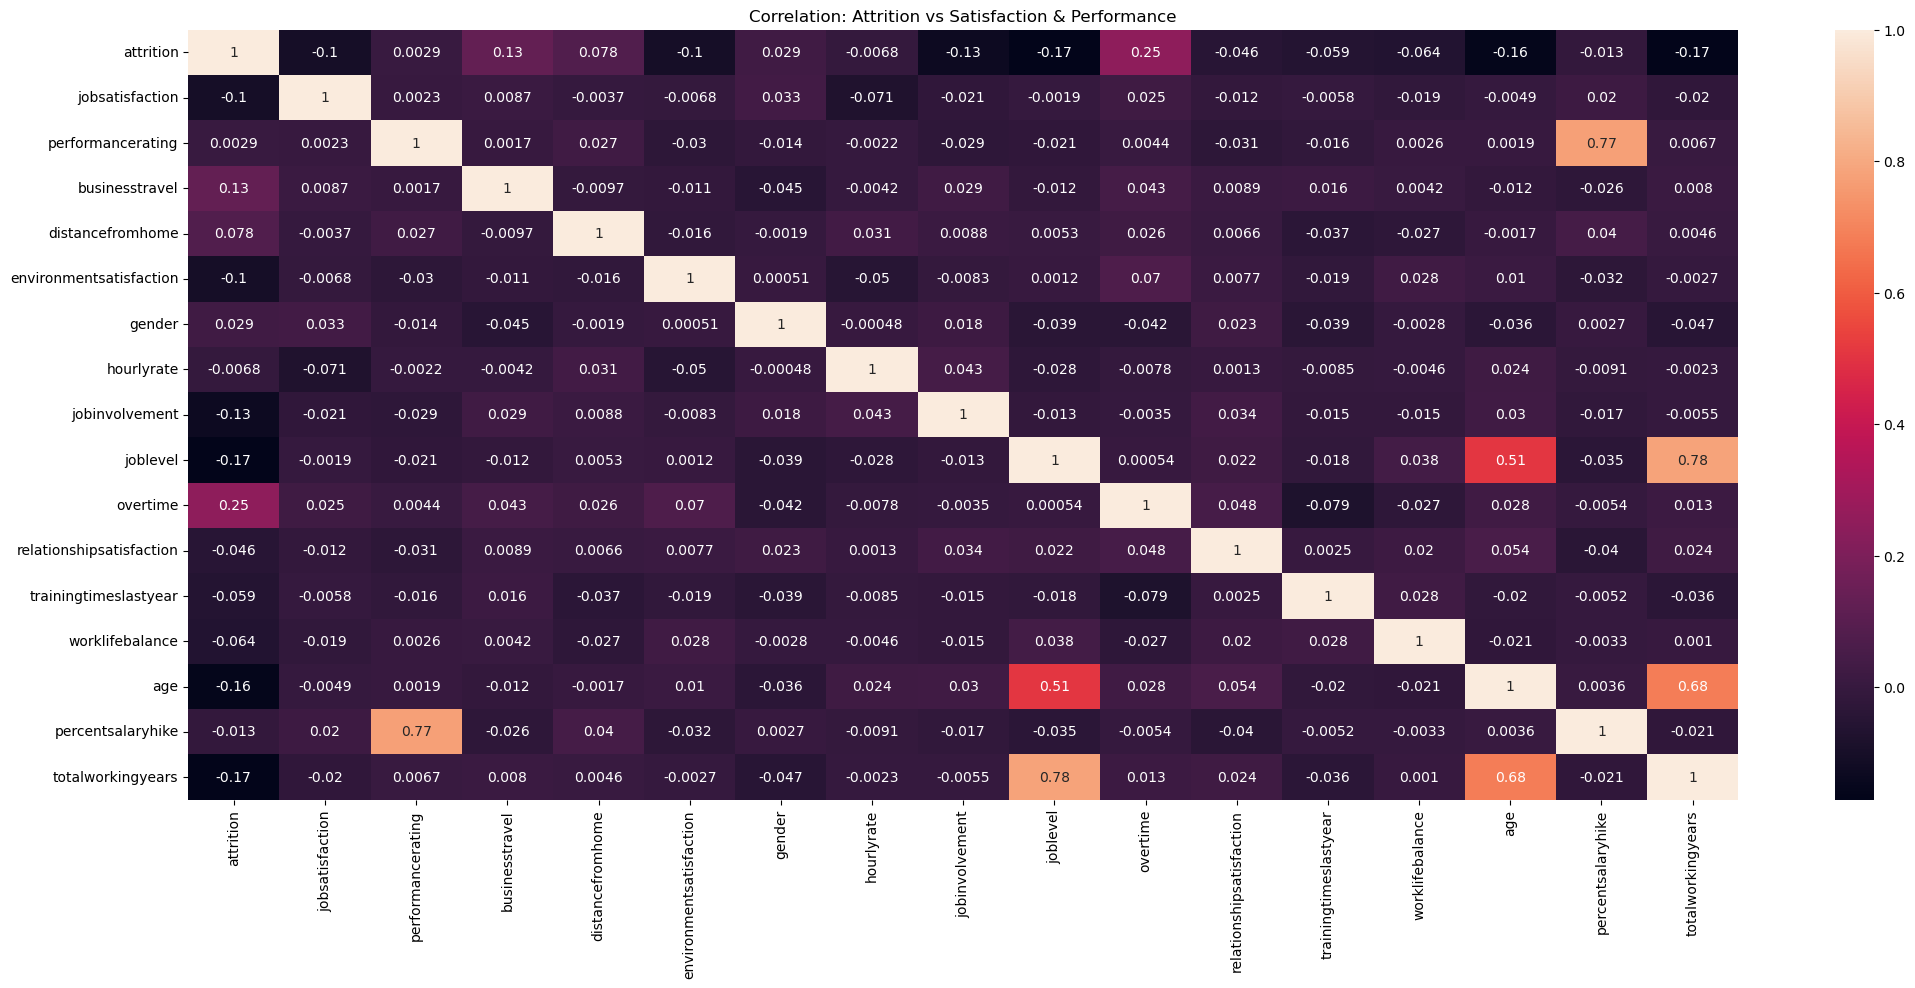

In [29]:
selected_cols = ['attrition', 'jobsatisfaction', 'performancerating', 'businesstravel', 'distancefromhome',
                 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel',
                 'overtime', 'relationshipsatisfaction', 'trainingtimeslastyear',
                 'worklifebalance', 'age', 'percentsalaryhike', 'totalworkingyears']
plt.figure(figsize=(25, 10))
sns.heatmap(data[selected_cols].corr(), annot=True, cmap='rocket')
plt.title("Correlation: Attrition vs Satisfaction & Performance")
plt.show()

In [15]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
businesstravel,1470.0,1.086395,0.532170,0.0,1.0,1.0,1.00,2.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
environmentsatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0
hourlyrate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
jobinvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
joblevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
jobsatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


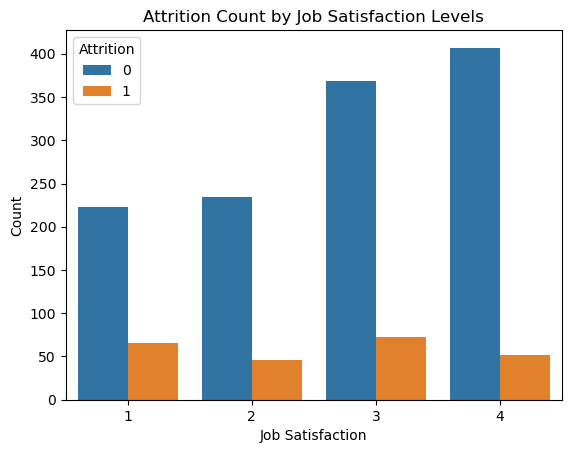

In [16]:
sns.countplot(data=data, x='jobsatisfaction', hue='attrition')
plt.title('Attrition Count by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

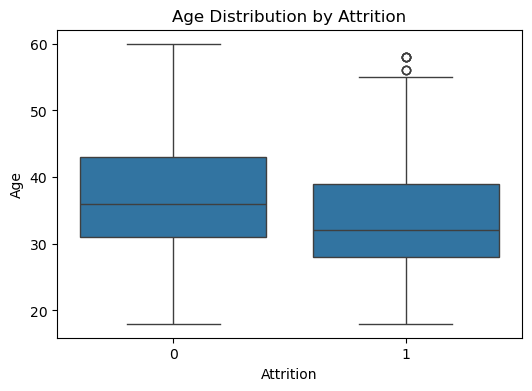

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='attrition', y='age')

plt.title('Age Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

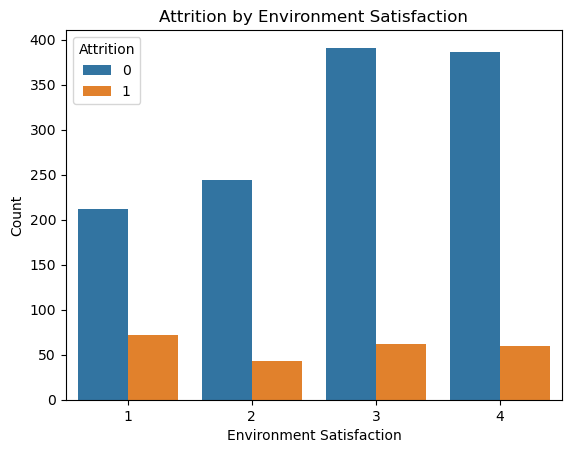

In [18]:

sns.countplot(data=data, x='environmentsatisfaction', hue='attrition')
plt.title('Attrition by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

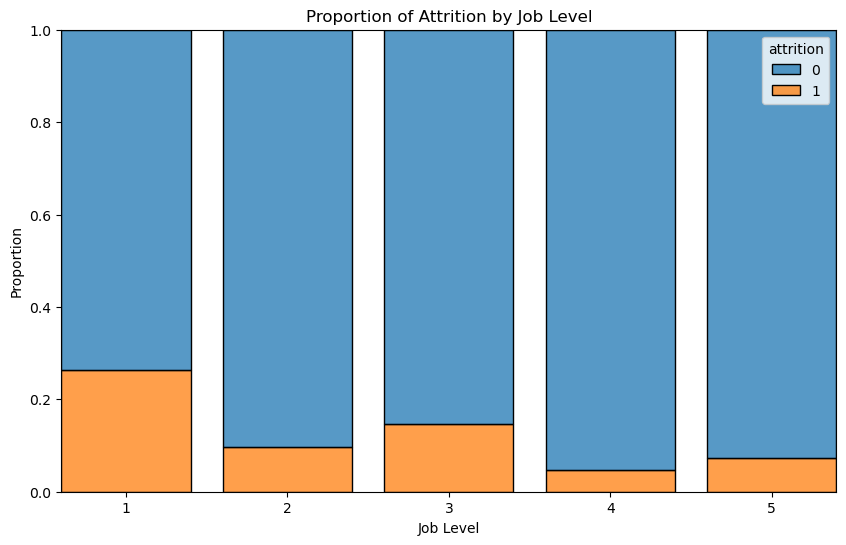

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='joblevel',
    hue='attrition',
    multiple='fill',
    shrink=0.8,
    stat='probability',
    discrete=True
)

plt.title('Proportion of Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Proportion')
plt.show()

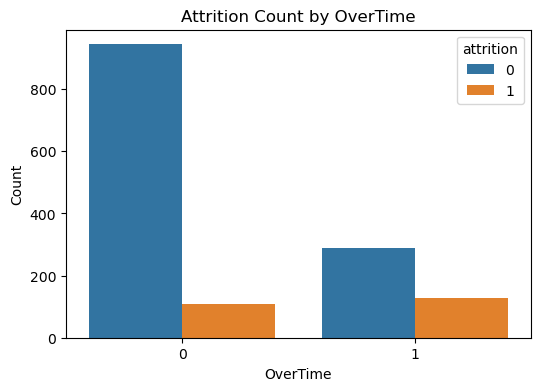

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x='overtime',
    hue='attrition'
)

plt.title('Attrition Count by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

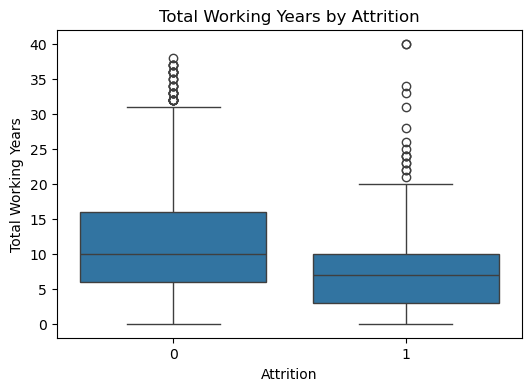

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='attrition',
    y='totalworkingyears'
)

plt.title('Total Working Years by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

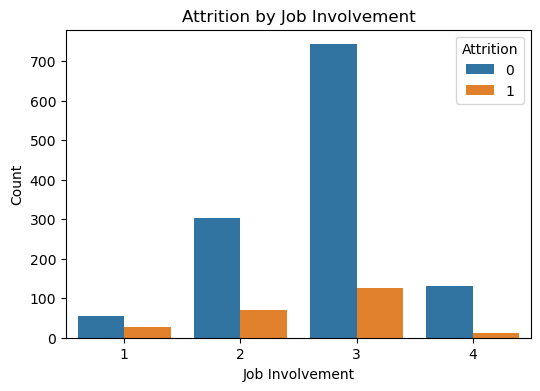

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x='jobinvolvement',
    hue='attrition'
)

plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

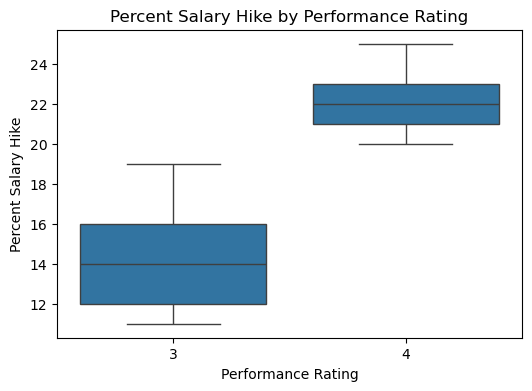

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='performancerating',
    y='percentsalaryhike'
)

plt.title('Percent Salary Hike by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Salary Hike')
plt.show()

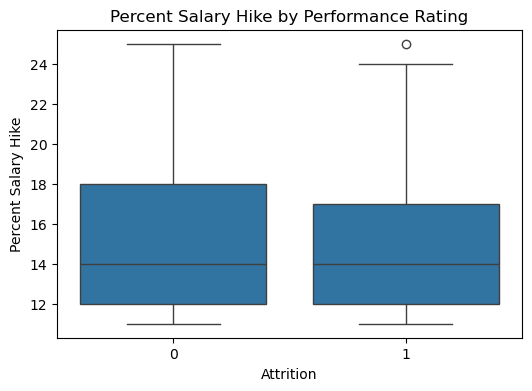

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='attrition',
    y='percentsalaryhike'
)

plt.title('Percent Salary Hike by Performance Rating')
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.show()

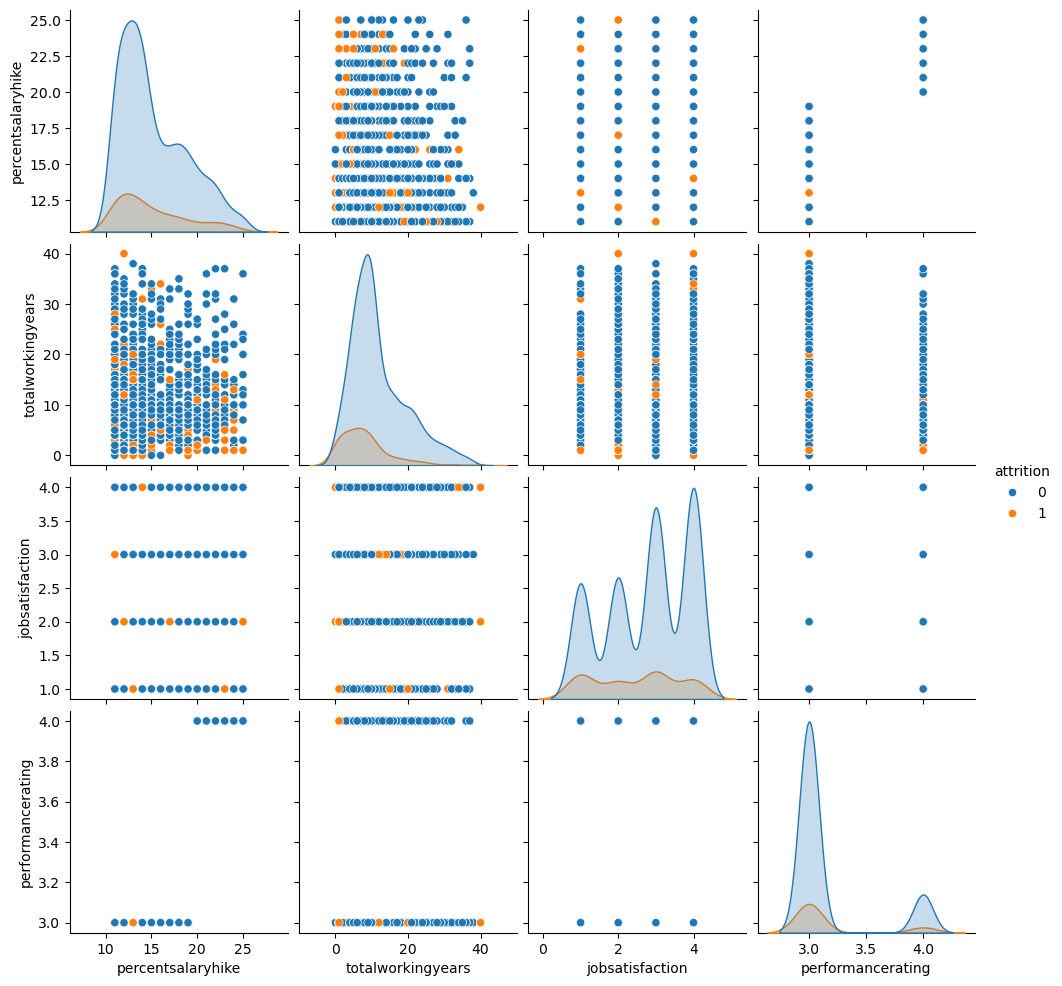

In [59]:
sns.pairplot(data, hue='attrition', vars=['percentsalaryhike', 'totalworkingyears','jobsatisfaction','performancerating'])